In [1]:
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(196816161)
plt.style.use("/Users/keto/.matplotlib/matplotlibrc")

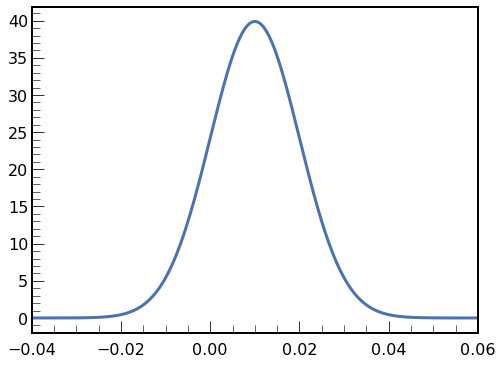

In [2]:
mu, sigma = 0.01, 0.01
dist = st.norm(mu, sigma)

xrange = np.linspace(mu-5*sigma, mu+5*sigma, 1000)
plt.plot(xrange, dist.pdf(xrange))

Consider an experiemnt with $N$ samples

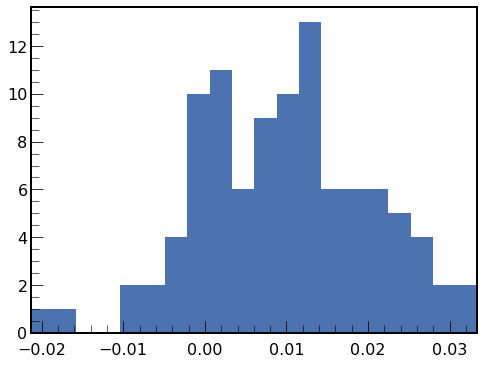

In [3]:
def get_sample(size):
    x = dist.rvs(size)
    return x

N = 100
x = get_sample(N)
plt.hist(x);

Estimate the mean to be the sample mean, and calculate the $\chi^2$

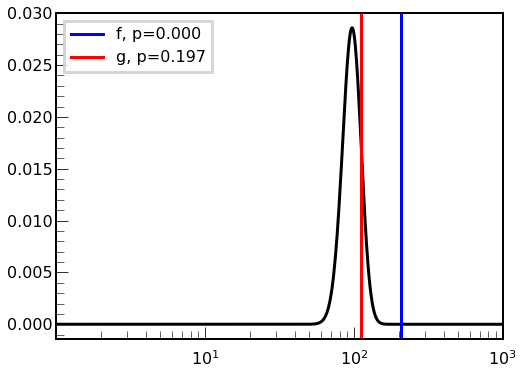

In [4]:
def f(x):
    return 0

def g(x):
    return np.mean(x)

def get_chi2(x, xpred, xsigma):
    res = x - xpred
    return np.sum(res**2 / xsigma**2)

xrange = np.linspace(0, 1000, 1000)
chi2_rv = st.chi2(N-1)
plt.plot(xrange, chi2_rv.pdf(xrange), color='k')

chi2 = get_chi2(x, f(x), sigma)
plt.axvline(chi2, color='b', label=f"f, p={1-chi2_rv.cdf(chi2):.3f}")

chi2 = get_chi2(x, g(x), sigma)
plt.axvline(chi2, color='r', label=f"g, p={1-chi2_rv.cdf(chi2):.3f}")

plt.xscale('log')
plt.legend();

In [5]:
def simulate(size, reps=10000):
    chi2_rv = st.chi2(size-1)
    
    results = {
        "f": [],
        "g": [],
        "delta": [],
        "size": size
    }
    for i in range(reps):
        x = get_sample(size)
        chi2_f = get_chi2(x, f(x), sigma)
        results["f"].append(chi2_f)
        
        chi2_g = get_chi2(x, g(x), sigma)
        results["g"].append(chi2_g)
        results["delta"].append(chi2_f - chi2_g)
        
    return results

results = simulate(100, 10000)

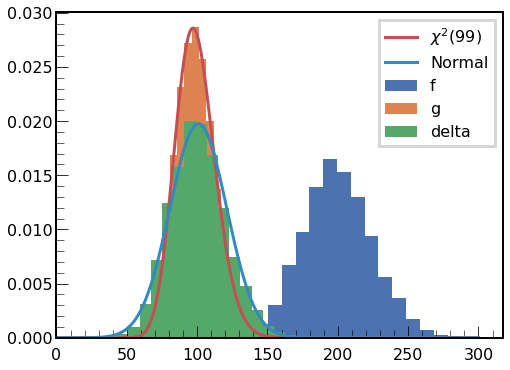

In [6]:
plt.hist(results["f"], density=True, label="f")
plt.hist(results["g"], density=True, label="g")
plt.hist(results["delta"], density=True, label="delta")

xrange = np.linspace(0, 300, 1000)
plt.plot(xrange, st.chi2(results["size"]-1).pdf(xrange), label=fr"$\chi^2({results['size']-1})$")
plt.plot(xrange, st.norm(np.mean(results["delta"]), np.std(results["delta"])).pdf(xrange), label=fr"Normal")

plt.legend();